In [32]:
import onnx
import onnxruntime as ort
import numpy as np
import rasterio as r
import matplotlib.pyplot as plt

In [23]:
model_path = "/content/drive/MyDrive/Colab Notebooks/concat_unet-v1.0.onnx"

In [ ]:
# Load the ONNX model
model = onnx.load(model_path)

# Check that the model is well formed
onnx.checker.check_model(model)

# Print a human readable representation of the graph
print(onnx.helper.printable_graph(model.graph))

In [50]:
ort_session = ort.InferenceSession(model_path)
my_input = "/content/drive/MyDrive/Colab Notebooks/44069_raw.tif"
my_image = r.open(my_input)
my_channels = my_image.read()

print(my_image.shape)
print(my_channels.shape)

my_channels = my_channels[np.newaxis]
my_channels = np.append(my_channels, np.zeros(shape=(1, 12, 809, 491), dtype=np.float32), axis=0)

print(my_channels.shape)
my_channels_cut = my_channels[:, :, :480, :480]

outputs = ort_session.run(
    None,
    {ort_session.get_inputs()[0].name: my_channels_cut},
)
print(outputs[0])

(809, 491)
(12, 809, 491)
(2, 12, 809, 491)
[[[[ 0.99339414  0.91304255  0.7945013  ...  0.78280765  0.6788726
     0.50737196]
   [ 0.7350149   0.6422327   0.6157753  ...  0.5262062   0.56909335
     0.4510941 ]
   [ 0.9019319   0.8027183   0.71342075 ...  0.51547897  0.4451822
     0.3274785 ]
   ...
   [ 0.90608335  0.73915005  0.6274901  ...  0.53233105  0.46528563
     0.27215904]
   [ 0.6938587   0.692224    0.7318141  ...  0.68010336  0.7483855
     0.4258226 ]
   [ 0.49172795  0.67400956  0.5410191  ...  0.4818507   0.47322652
     0.27135623]]

  [[-0.71993715 -0.59471595 -0.76296926 ... -0.5897137  -0.5973555
    -0.691921  ]
   [-0.7565013  -0.6226079  -0.5704341  ... -0.445957   -0.5815243
    -0.687439  ]
   [-0.8954243  -0.68546486 -0.65540725 ... -0.42194718 -0.42808574
    -0.65585464]
   ...
   [-0.7754602  -0.5378787  -0.46398464 ... -0.2929159  -0.26586077
    -0.58249056]
   [-0.5675231  -0.5875181  -0.59236544 ... -0.49852118 -0.5465294
    -0.7183937 ]
   [-0.5710

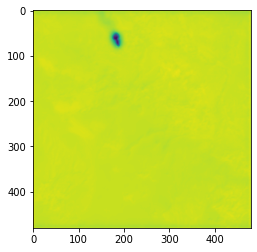

In [66]:
# mask = np.array([False, False])
# my_output = outputs[0][False, False]

my_outputs = outputs[0][0, 0, :, :]

plt.imshow(my_outputs)